In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving HDFCBANK.csv to HDFCBANK (1).csv


{'HDFCBANK.csv': b'Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble\n2000-01-03,HDFCBANK,EQ,157.4,166.0,170.0,166.0,170.0,170.0,169.52,33259,563812250000.0,,,\n2000-01-04,HDFCBANK,EQ,170.0,182.0,183.45,171.0,174.0,173.8,174.99,168710,2952261350000.0,,,\n2000-01-05,HDFCBANK,EQ,173.8,170.0,173.9,165.0,168.0,166.95,169.2,159820,2704093975000.0,,,\n2000-01-06,HDFCBANK,EQ,166.95,168.0,170.0,165.3,168.95,168.3,168.44,85026,1432165990000.0,,,\n2000-01-07,HDFCBANK,EQ,168.3,162.15,171.0,162.15,170.75,168.35,166.79,85144,1420157785000.0,,,\n2000-01-10,HDFCBANK,EQ,168.35,172.9,179.5,165.0,166.3,165.9,167.79,100434,1685217295000.0,,,\n2000-01-11,HDFCBANK,EQ,165.9,166.5,167.9,157.0,163.0,163.4,161.4,145784,2352906750000.0,,,\n2000-01-12,HDFCBANK,EQ,163.4,163.75,167.95,162.3,165.1,165.45,163.89,85952,1408657535000.0,,,\n2000-01-13,HDFCBANK,EQ,165.45,169.9,169.9,165.0,165.95,165.1,165.26,48276,797787115000.0,,,\n2000-01-14,HDFCBANK,EQ,1

In [ ]:
df = pd.read_csv('HDFCBANK.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
2021-04-27,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
2021-04-28,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971
2021-04-29,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.50,1481.15,12039276,1.783196e+15,252296.0,4818551.0,0.4002


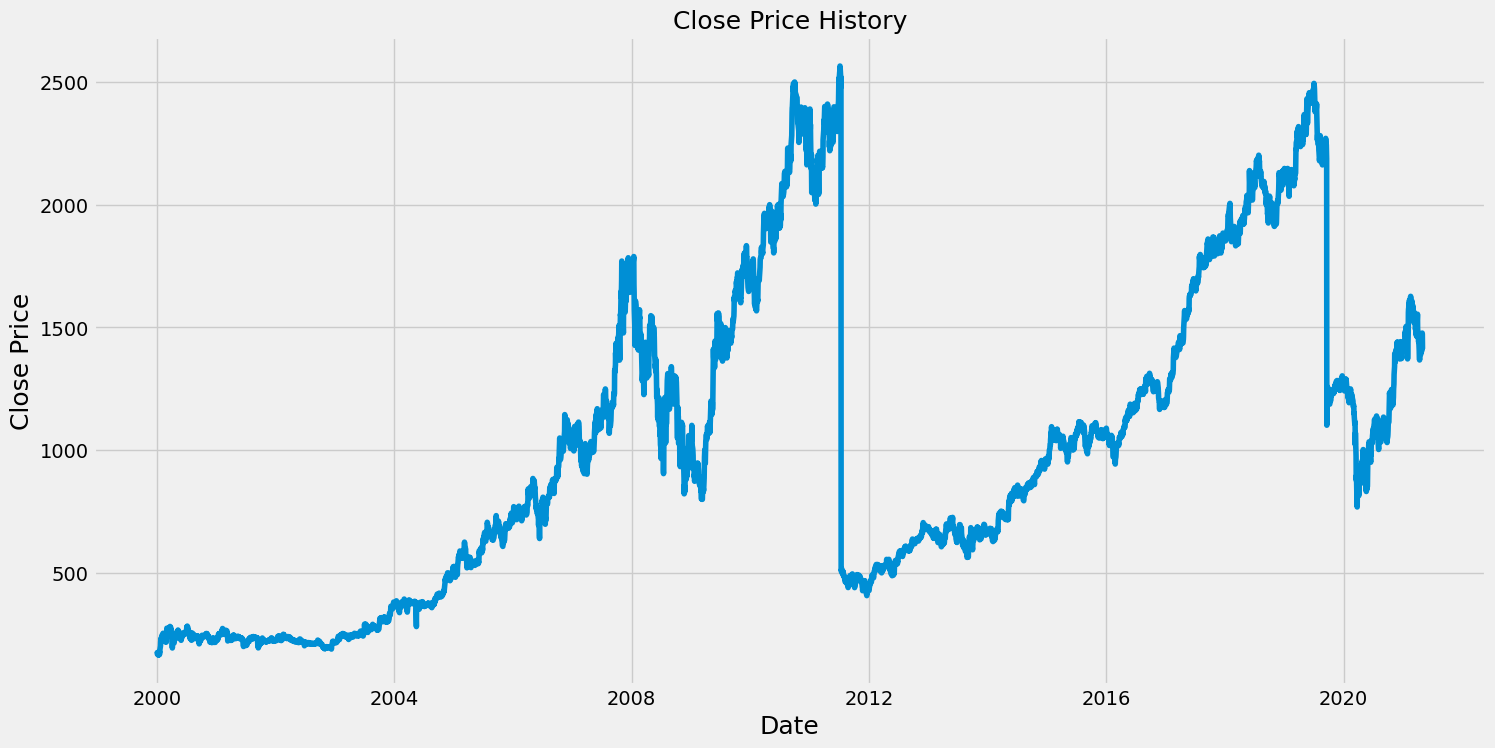

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df [ 'Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

df['SMA50']=SMA(df, 50)
df['SMA200']=SMA(df, 200)

In [ ]:
df['Signal'] = np.where(df[ 'SMA50'] > df['SMA200'], 1, 0)
df['Position'] = df['Signal'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np.NAN)

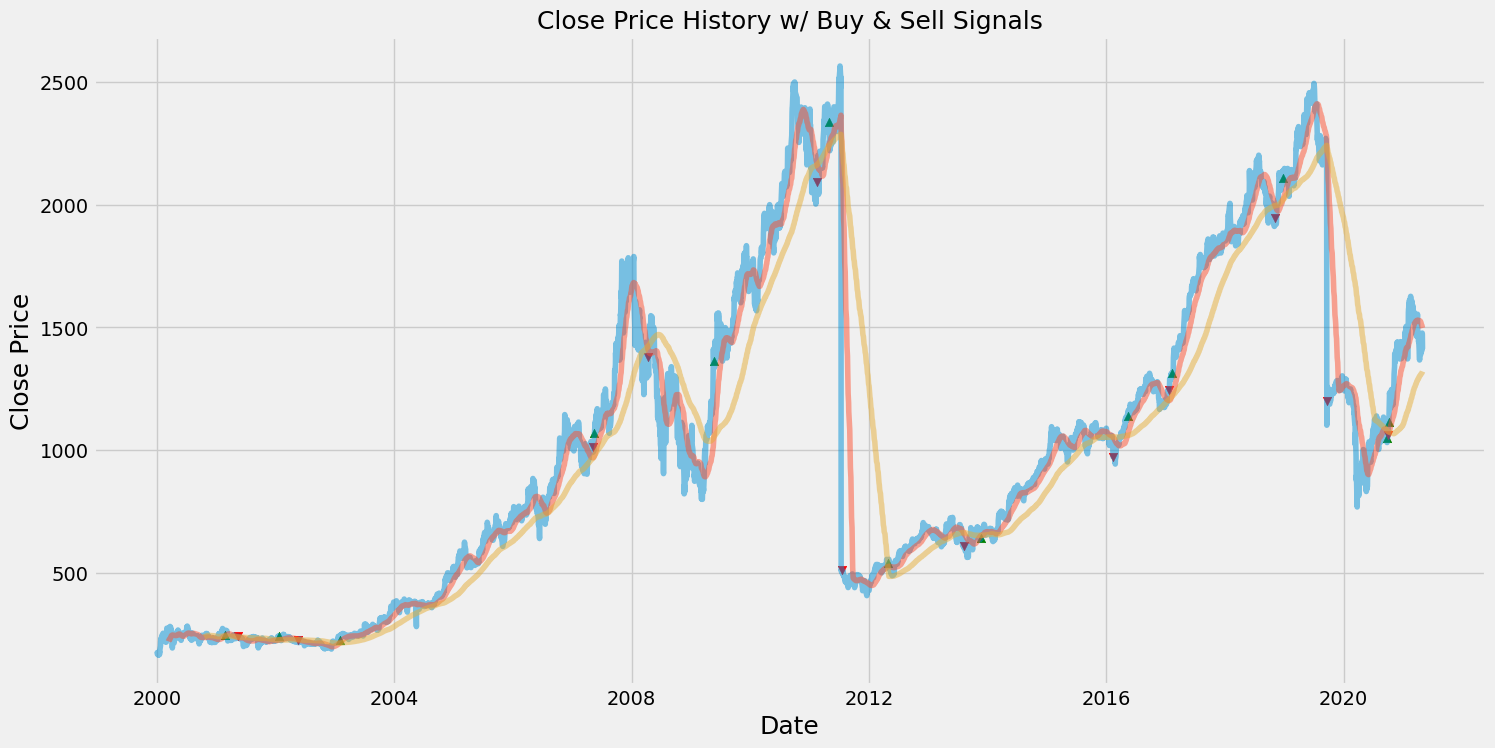

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha = 0.5, label='Close')
plt.plot(df['SMA50'], alpha = 0.5, label='SMA50')
plt.plot(df['SMA200'], alpha = 0.5, label='SMA200')
plt.scatter (df.index, df['Buy'], alpha = 1, label='Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label='Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()